In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#i will use LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


data collection


In [48]:

# put  names for  column  
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Load  Iris dataset
iris_data = pd.read_csv("iris.data", header=None, names=column_names)

# Display  few rows of the dataset 
print(iris_data.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Data Exploration

Number of Rows: 150
Number of Columns: 5

Distribution of Flower Species:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


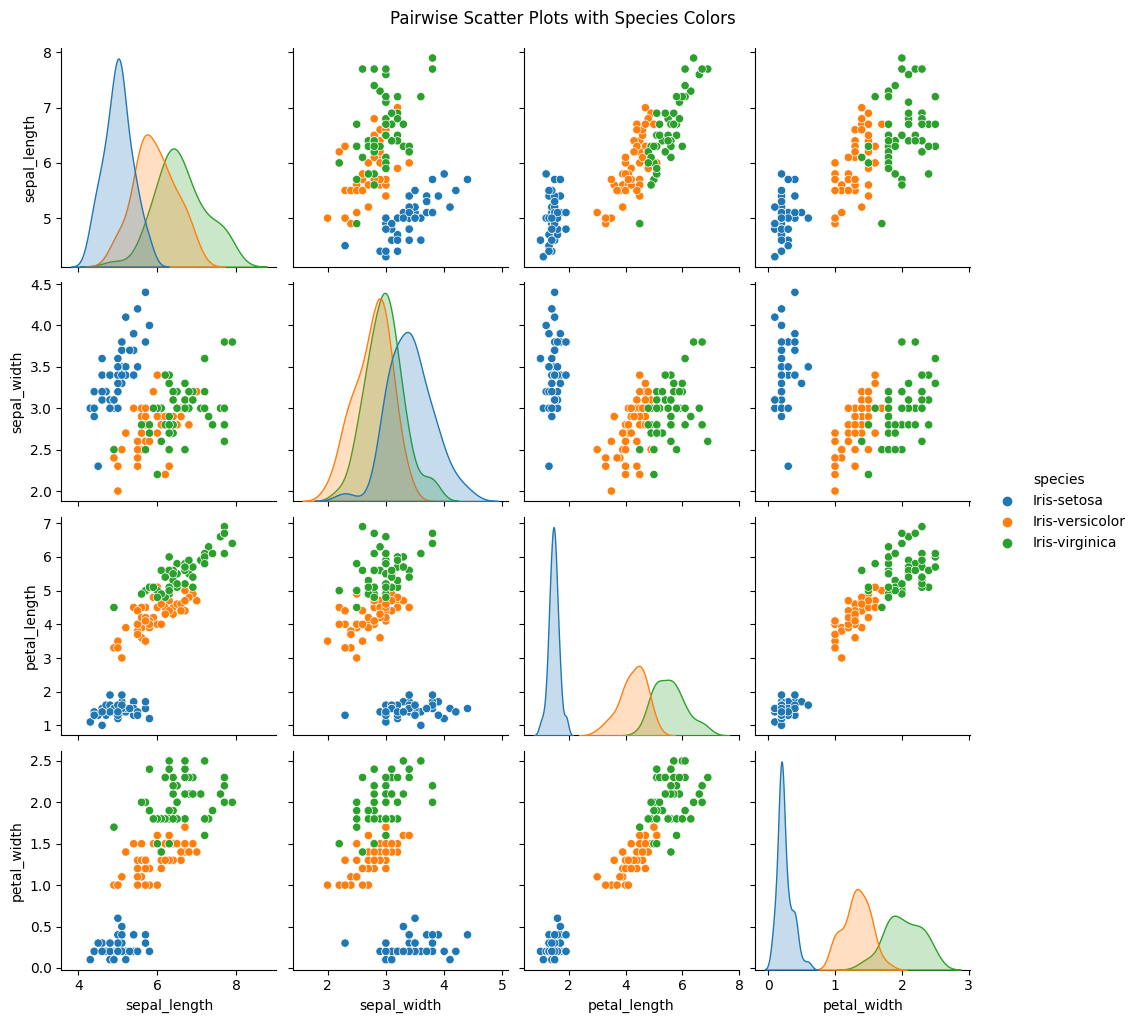

In [49]:
#load data with the names i put
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv("iris.data", names=column_names)  

# Number of rows and columns
num_rows, num_columns = data.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


#Distribution of Data Points 
# Count of data points for each species
species_counts = data['species'].value_counts()
print("\nDistribution of Flower Species:")
print(species_counts)


#  Relationship between Features and Target Variable
sns.pairplot(data=data, hue='species')
plt.suptitle("Pairwise Scatter Plots with Species Colors", y=1.02)
plt.show()




Data Preprocessing


In [50]:
# Check  missing values 
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [51]:

# Encode  categorical target variable ---species---
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

# Split the dataset into features (X) , target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into  training set and  testing set ---80% train, 20% test---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


Model selection
(LogisticRegression)

In [52]:
# Create  model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)



Model Training

In [53]:
# Train  model on the training data
logistic_regression_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

Model Evaluation

In [54]:

# Predict the target labels
y_pred = logistic_regression_model.predict(X_test)

#  accuracy
accuracy = accuracy_score(y_test, y_pred)

# make classification report
classification_report = classification_report(y_test, y_pred)

# make confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report)
print("\nConfusion Matrix:\n", confusion_matrix)


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Prediction

In [56]:

#  function to get user input and make predictions
def predict_flower_species(model):
    print("Enter flower measurements:")
    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))

    # Create a NumPy array 
    new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Make predictions using the model
    prediction = model.predict(new_data)

    # Map numerical to clearify the output 
    class_names = {
        0: "Iris-setosa",
        1: "Iris-versicolor",
        2: "Iris-virginica"
    }

    # Get the predicted class label
    predicted_class_label = prediction[0]

    # Map the numerical prediction to the actual class name
    predicted_class_name = class_names.get(predicted_class_label, "Unknown")

    # Print the predicted species
    print(f"Predicted Flower Species: {predicted_class_name}")

if __name__ == "__main__":
    # Call the predict_flower_species function with your trained model
    predict_flower_species(logistic_regression_model)


Enter flower measurements:
Predicted Flower Species: Iris-setosa


c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Visualization

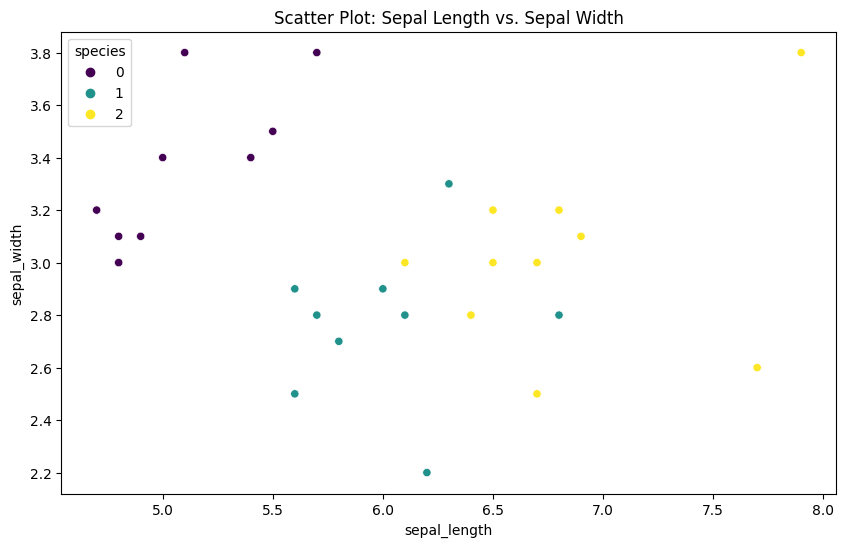

In [63]:
# Scatter plot for Sepal Length vs. Sepal Width 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['sepal_length'], y=X_test['sepal_width'], hue=y_test, palette='viridis')
plt.title('Scatter Plot: Sepal Length vs. Sepal Width')
plt.show()


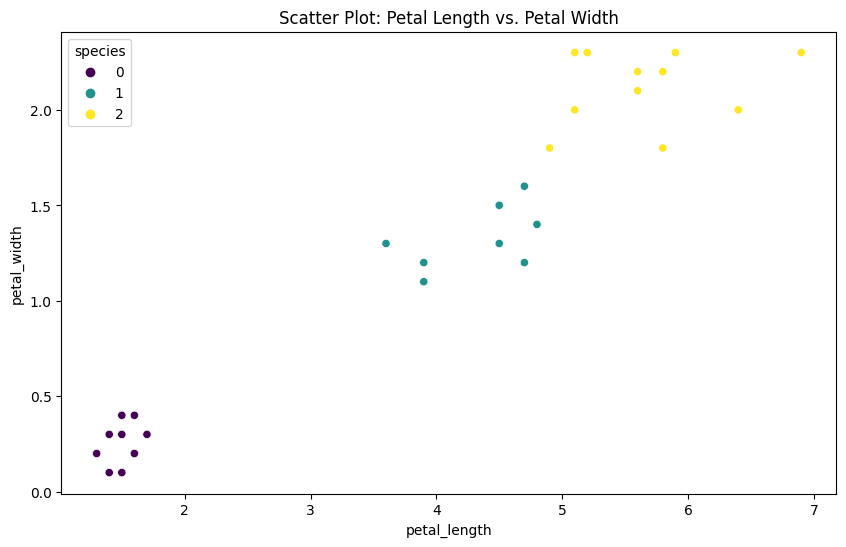

In [64]:
# Scatter plot for Petal Length vs. Petal Width 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['petal_length'], y=X_test['petal_width'], hue=y_test, palette='viridis')
plt.title('Scatter Plot: Petal Length vs. Petal Width')
plt.show()


Hyperparameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define a set of hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create and fit a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the  hyperparameters and  model
best_params, best_model = grid_search.best_params_, grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

# Evaluate the  model on the testing data
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Data with Best Hyperparameters:", accuracy)


c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy on Test Data with Best Hyperparameters: 1.0


c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was